# **Practica 2:** 2-point Statistics

### *Métodos Estadísticos y Numéricos en Cosmología*

#### *Hugo Rivera Morales*

In [13]:
#Paqueterias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import random

## 1 Generate Correlated Data in 2D

1. In a 2d box of 100 units per side, build a catalogue of a 1000 randomly distributed points. We will call it set R.

In [14]:
# Constantes
# Dimensions of the box
box_width = 100.0
box_height = 100.0
n_points = 1000 # Number of random points

In [15]:
# Función generadora de puntos aleatorios en la caja
def generate_random_points(n, width, height):
    points = [[], []]
    for _ in range(n):
        x = random.uniform(0, width)
        y = random.uniform(0, height)
        #Add centers
        points[0].append(x)
        points[1].append(y)
    return points
# Generate random points within the box
R = generate_random_points(n_points, box_width, box_height)

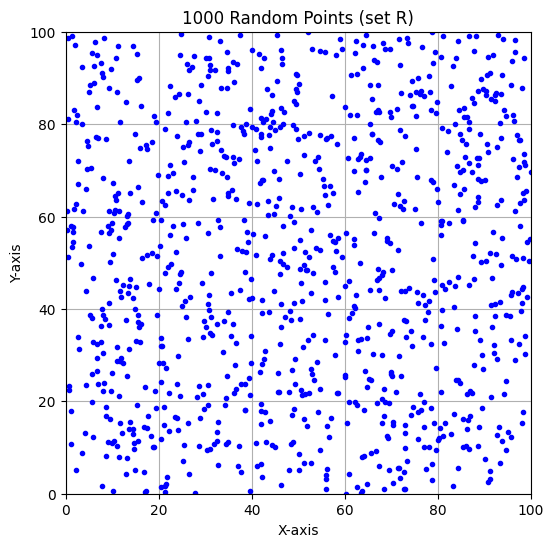

In [16]:
# Create a scatter plot
plt.figure(figsize=(6, 6))
plt.plot(R[0], R[1], '.', c='blue')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'{n_points} Random Points (set R)')
plt.xlim(0, box_width)
plt.ylim(0, box_height)
plt.grid(True)
plt.show()

2. In a 2D box of 100 units per side, build a catalog with 1000 randomly distributed points around 20 circumferences of radius 30 whose centers are randomly distributed within the box. We will call it set D

In [17]:
n_circumferences = 20 # Number of circumferences and points per circumference
r = 30 # Radius of the circunferences
n_points_per_circumference = n_points // n_circumferences # Number of points per circumference

In [18]:
# Función generadora de puntos aleatorios alrededor de los centros
def generate_points_around_center(cx, cy, n_points_per_circumference, radius):
    points = [[], []]
    for _ in range(n_points_per_circumference):
        angle = random.uniform(0, 2 * np.pi)
        x = cx + radius * np.cos(angle)
        y = cy + radius * np.sin(angle)
# Periodicidad de los puntos en la caja
        x = x % box_width
        y = y % box_height
        #Add centers
        points[0].append(x)
        points[1].append(y)
    return points

# Generate random centers for the circumferences (usando la función del inciso 1)
centers = generate_random_points(n_circumferences, box_width, box_height)

# Generate points around each center
D = [[], []]
for i in range(n_circumferences):
    points = generate_points_around_center(centers[0][i], centers[1][i], n_points_per_circumference, r)
    D[0].extend(points[0])
    D[1].extend(points[1])
    
# Add the centers to the list
D[0].extend(centers[0])
D[1].extend(centers[1])

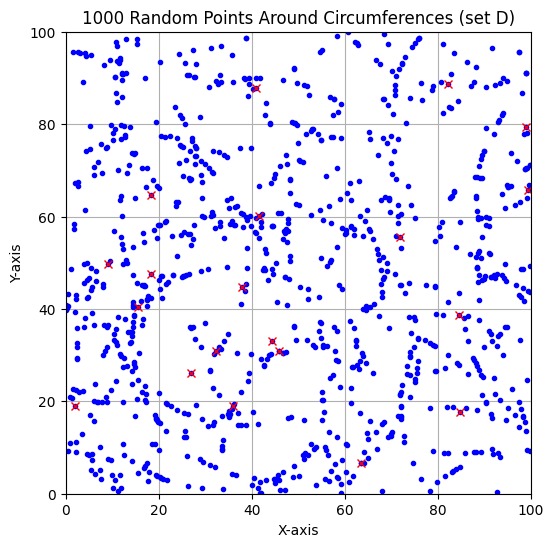

In [19]:
# Plot the generated points
plt.figure(figsize=(6, 6))
plt.plot(D[0], D[1], '.', c='blue')
plt.plot(centers[0], centers[1], 'x', c='red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'{n_points} Random Points Around Circumferences (set D)')
plt.xlim(0, box_width)
plt.ylim(0, box_height)
plt.grid(True)
# plt.legend()
plt.show()

## 2 Generate Distances Histograms

Code an algorithm that calculates the histogram of all distances between 2-points in the 2D box catalogue. You need two loops that run over the data to calculate all distances. To obtain a histogram, you need to split distances in fixed intervals or bins.

*Hints: Your code should only save the histogram and not all the distances. What is the maximum distance for your histogram in a 2d box of 100 units per side? How can you make your code more efficient?*

In [20]:
num_bins = 500 # Numero de bins
dist_max = np.sqrt(box_width**2 + box_height**2) # Distancia máxima entre dos puntos

In [21]:
# Función para calcular histograma de un set
def func_histogram(n_bins, set):
    dbin = dist_max/n_bins # Tamaño de los bins
    bins = np.array([(dbin/2) + (i*dbin) for i in range(n_bins)]) # Centros de los bins
    frecuency = np.zeros(n_bins) # Frecuency del histograma

# Calculo de las distancias
    for i in range(len(set[0])):
        # Primer punto
        x1 = set[0][i]
        y1 = set[1][i]
        for j in range(i+1, len(set[0])):
            # Segundo punto
            x2 = set[0][j]
            y2 = set[1][j]
            distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            correspond_bin = int(distance/dbin) # Bin correspondiente
            frecuency[correspond_bin]+=1 # Agrega +1 valor a la frecuency
    return [bins, frecuency]

1. For the data set denoted by D. Normalize it (by dividing it by the total number of distances in D), so that the sum of all bins adds up to 1 (check this!). We will call this histogram DD.

In [22]:
# Histograma DD
DD = func_histogram(num_bins,D)
# Normalizando el set
DD[1] = DD[1]/sum(DD[1])
# Prueba de la suma
sum(DD[1])

0.9999999999999992

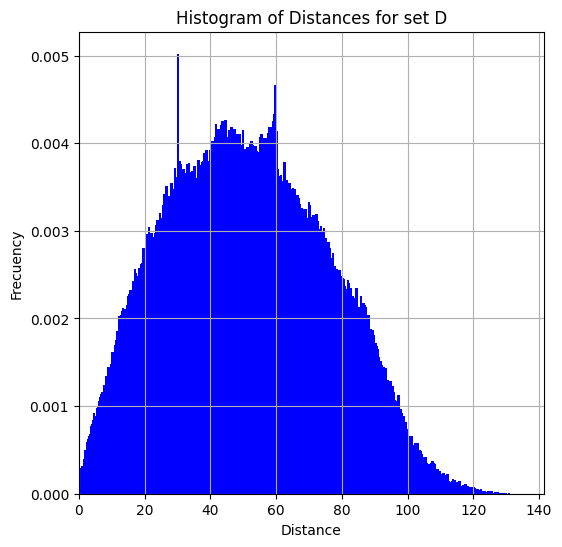

In [23]:
# Plot the histogram
plt.figure(figsize=(6, 6))
plt.bar(DD[0], DD[1], color='blue')
plt.xlim(0,dist_max)
plt.xlabel('Distance')
plt.ylabel('Frecuency')
plt.title('Histogram of Distances for set D')
plt.grid(True)
plt.show()

2. For the data set denoted by R. Normalize it. We will call this histogram RR.

In [24]:
RR = func_histogram(num_bins,R)
RR[1] = RR[1]/sum(RR[1])
sum(RR[1])

0.9999999999999998

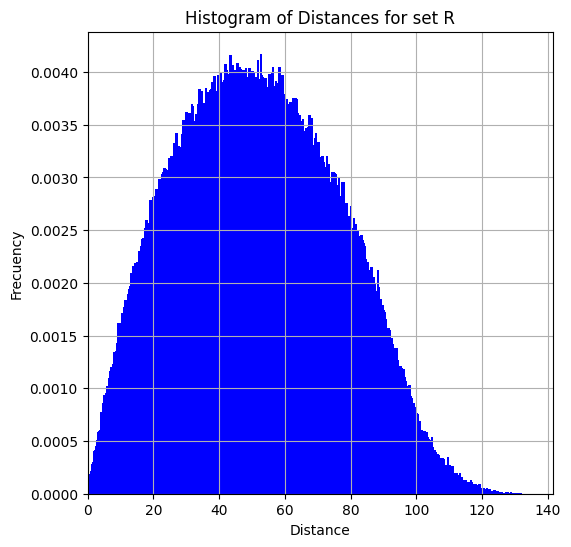

In [25]:
plt.figure(figsize=(6, 6))
plt.bar(RR[0], RR[1], color='blue')
plt.xlim(0,dist_max)
plt.xlabel('Distance')
plt.ylabel('Frecuency')
plt.title('Histogram of Distances for set R')
plt.grid(True)
plt.show()

3. For a mix between the randoms (R) and data (D) sets. One loop runs over the data sample D and the other over the randoms R. We will call this the DR histogram.

In [26]:
# Función para calcular histograma de dos set (DR)
def func_histogram_DR(n_bins, set1, set2):
    dbin = dist_max/n_bins 
    bins = np.array([(dbin/2) + (i*dbin) for i in range(n_bins)]) 
    frecuency = np.zeros(n_bins) 

# Calculo de las distancias
    for x1, y1 in zip(set1[0], set1[1]):
        for x2, y2 in zip(set2[0], set2[1]):
            distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            correspond_bin = int(distance/dbin)
            frecuency[correspond_bin]+=1
    return [bins, frecuency]

In [27]:
DR = func_histogram_DR(num_bins, D, R)
DR[1] = DR[1]/sum(DR[1])
sum(DR[1])

1.0000000000000004

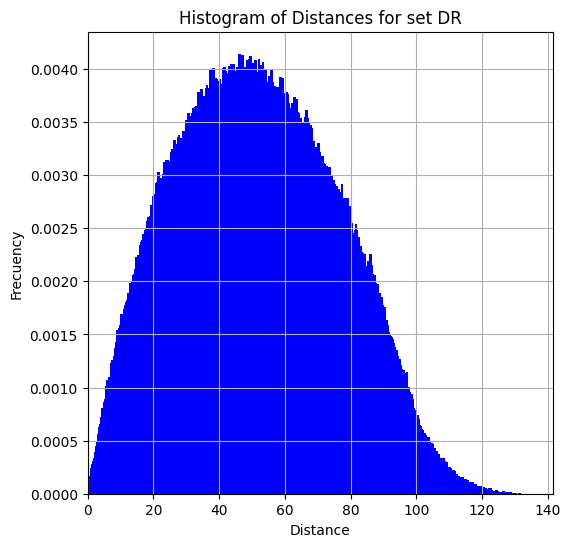

In [28]:
plt.figure(figsize=(6, 6))
plt.bar(DR[0], DR[1], color='blue')
plt.xlim(0,dist_max)
plt.xlabel('Distance')
plt.ylabel('Frecuency')
plt.title('Histogram of Distances for set DR')
plt.grid(True)
plt.show()

## 3 Build the estimator

Build the 2pt correlation function (2PCF) using the following estimators and the normalized histograms previously obtained

\begin{align}
\text{Peebles-Hauser}\hspace{1 cm}\xi_{PH}(\hat{r}) &= \frac{DD(r)}{RR(r)}-1\\
\text{Davis-Peebles}\hspace{1 cm}\xi_{DP}(\hat{r}) &= \frac{DD(r)}{DR(r)}-1\\
\text{Hamilton}\hspace{1 cm}\xi_{H}(\hat{r}) &= \frac{DD(r)RR(r)}{DR^{2}(r)}-1\\
\text{Landy-Szalay}\hspace{1 cm}\xi_{LS}(\hat{r}) &= \frac{DD(r)-2DR(r)+RR(r)}{RR(r)}
\end{align}

In [29]:
# Definición de los estimadores
# Pebbles-Hauser
def Peebles_Hauser(DDr, RRr):
    return (DDr/RRr) - 1
# Davis-Pebbles
def Davis_Peebles(DDr,DRr):
    return (DDr/DRr) - 1
# Hamilton
def Hamilton(DDr,RRr,DRr):
    return (DDr*RRr)/(DRr**2) - 1
# Landy-Szalay
def Landy_Szalay(DDr,RRr,DRr):
    return (DDr - 2*DRr + RRr)/RRr

C:\Users\hugor\AppData\Local\Temp\ipykernel_19844\2394821053.py:4: RuntimeWarning: divide by zero encountered in divide
  return (DDr/RRr) - 1
C:\Users\hugor\AppData\Local\Temp\ipykernel_19844\2394821053.py:4: RuntimeWarning: invalid value encountered in divide
  return (DDr/RRr) - 1


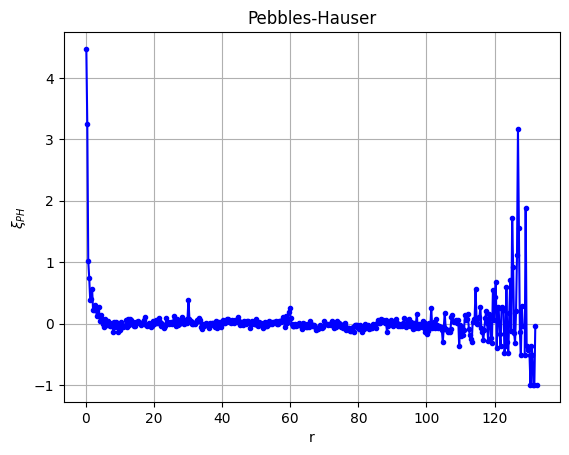

C:\Users\hugor\AppData\Local\Temp\ipykernel_19844\2394821053.py:7: RuntimeWarning: divide by zero encountered in divide
  return (DDr/DRr) - 1
C:\Users\hugor\AppData\Local\Temp\ipykernel_19844\2394821053.py:7: RuntimeWarning: invalid value encountered in divide
  return (DDr/DRr) - 1


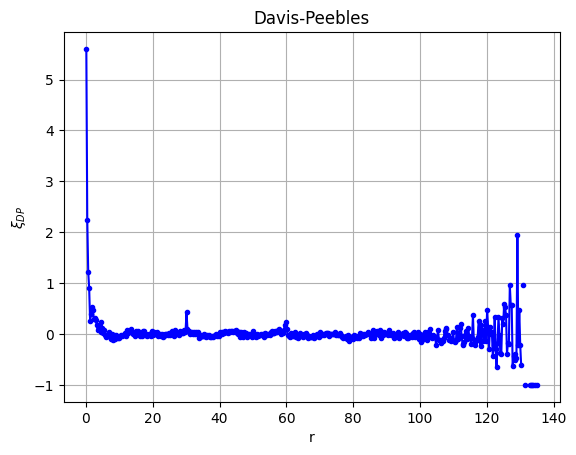

C:\Users\hugor\AppData\Local\Temp\ipykernel_19844\2394821053.py:10: RuntimeWarning: divide by zero encountered in divide
  return (DDr*RRr)/(DRr**2) - 1
C:\Users\hugor\AppData\Local\Temp\ipykernel_19844\2394821053.py:10: RuntimeWarning: invalid value encountered in divide
  return (DDr*RRr)/(DRr**2) - 1


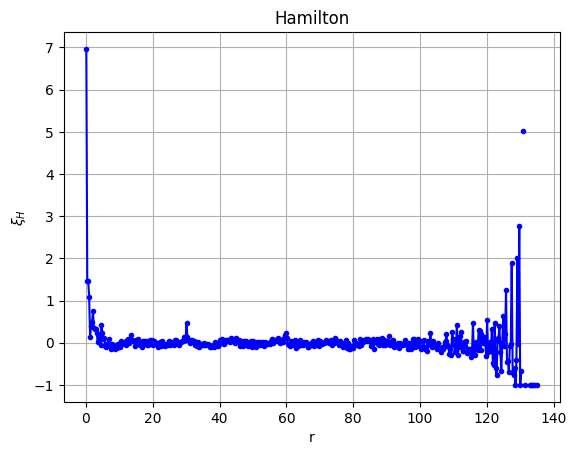

C:\Users\hugor\AppData\Local\Temp\ipykernel_19844\2394821053.py:13: RuntimeWarning: divide by zero encountered in divide
  return (DDr - 2*DRr + RRr)/RRr
C:\Users\hugor\AppData\Local\Temp\ipykernel_19844\2394821053.py:13: RuntimeWarning: invalid value encountered in divide
  return (DDr - 2*DRr + RRr)/RRr


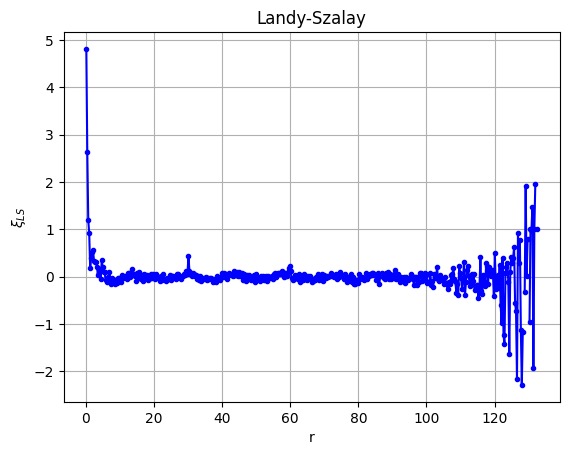

In [30]:
# Plot de las funciones de correlación
# Pebbles-Hauser
plt.plot(DD[0],Peebles_Hauser(DD[1], RR[1]), '.-', color='blue')
plt.xlabel('r')
plt.ylabel('$\\xi_{PH}$')
plt.title('Pebbles-Hauser')
plt.grid(True)
plt.show()
# Davis-Pebbles
plt.plot(DD[0], Davis_Peebles(DD[1], DR[1]), '.-', color='blue')
plt.xlabel('r')
plt.ylabel('$\\xi_{DP}$')
plt.title('Davis-Peebles')
plt.grid(True)
plt.show()
# Hamilton
plt.plot(DD[0], Hamilton(DD[1], RR[1], DR[1]), '.-', color='blue')
plt.xlabel('r')
plt.ylabel('$\\xi_H$')
plt.title('Hamilton')
plt.grid(True)
plt.show()
# Landy-Szalay
plt.plot(DD[0], Landy_Szalay(DD[1], RR[1], DR[1]), '.-', color='blue')
plt.xlabel('r')
plt.ylabel('$\\xi_{LS}$')
plt.title('Landy-Szalay')
plt.grid(True)
plt.show()

## 4 Test Randoms

1. Construct 3 more boxes of randomly distributed points as in Ex. 1, but with 2000, 5000 and 10000 points instead. Label each box as RRxY, where Y=2,5,10.

In [31]:
# 2000 points
Rx2 = generate_random_points(2000, box_width, box_height)
# 5000 points
Rx5 = generate_random_points(5000, box_width, box_height)
# 10000 points
Rx10 = generate_random_points(10000, box_width, box_height)

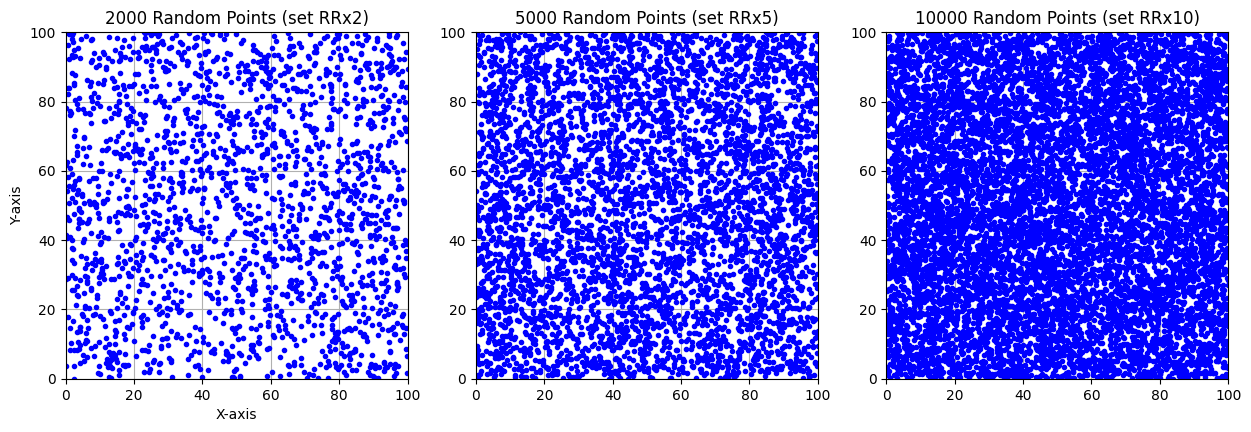

In [32]:
# Plot the generated points
# 2000 pts
plt.figure(figsize=(15, 4.5))
plt.subplot(1,3,1)
plt.plot(Rx2[0], Rx2[1], '.', c='blue')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2000 Random Points (set RRx2)')
plt.xlim(0, box_width)
plt.ylim(0, box_height)
plt.grid(True)
# 5000 pts
plt.subplot(1,3,2)
plt.plot(Rx5[0], Rx5[1], '.', c='blue')
plt.title('5000 Random Points (set RRx5)')
plt.xlim(0, box_width)
plt.ylim(0, box_height)
plt.grid(True)
# 10000 pts
plt.subplot(1,3,3)
plt.plot(Rx10[0], Rx10[1], '.', c='blue')
plt.title('10000 Random Points (set RRx10)')
plt.xlim(0, box_width)
plt.ylim(0, box_height)
plt.grid(True)

2. Use Landy-Szalay's estimator to calculate the 2PCF using the histograms from the random files DDxY (have to repeat exercise 3 and 4). Be aware of the normalization. Show in a single plot the 2PCFs using the different DDxY random catalogues.

In [33]:
# Histogramas normalizados individuales
# RRx2
RRx2= func_histogram(num_bins, Rx2)
RRx2[1] = RRx2[1]/sum(RRx2[1])
# RRx5
RRx5= func_histogram(num_bins,Rx5)
RRx5[1] = RRx5[1]/sum(RRx5[1])
# RRx10
RRx10= func_histogram(num_bins,Rx10)
RRx10[1] = RRx10[1]/sum(RRx10[1])

# Histogramas normalizados for mixed sets (DR)
# RRx2
DRx2 = func_histogram_DR(num_bins, D, Rx2)
DRx2[1] = DRx2[1]/sum(DRx2[1])
# RRx5
DRx5 = func_histogram_DR(num_bins, D, Rx5)
DRx5[1] = DRx5[1]/sum(DRx5[1])
# RRx10
DRx10 = func_histogram_DR(num_bins, D, Rx10)
DRx10[1] = DRx10[1]/sum(DRx10[1])

C:\Users\hugor\AppData\Local\Temp\ipykernel_19844\2394821053.py:13: RuntimeWarning: invalid value encountered in divide
  return (DDr - 2*DRr + RRr)/RRr


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

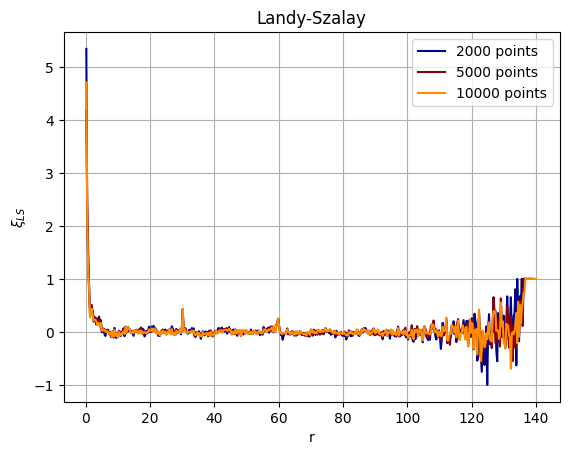

In [34]:
# Plot de 2pcf Landy Szalay
plt.plot(DD[0], Landy_Szalay(DD[1], RRx2[1], DRx2[1]), label='2000 points', color='darkblue')
plt.plot(DD[0], Landy_Szalay(DD[1], RRx5[1], DRx5[1]), label='5000 points', color='darkred')
plt.plot(DD[0], Landy_Szalay(DD[1], RRx10[1], DRx10[1]), label='10000 points', color='darkorange')
plt.xlabel('r')
plt.ylabel('$\\xi_{LS}$')
plt.title('Landy-Szalay')
plt.grid(True)
plt.legend()

np.seterr(divide='ignore', invalid='ignore')

3. Test your methodology by using DD=RR1 and the rest of the RRX as the randoms files. Show that in this case the 2PCF estimators should be "consistent" with zero.

In [35]:
# DR
# 2000 pts
DR1x2 = func_histogram_DR(num_bins, R, Rx2)
DR1x2[1] = DR1x2[1]/sum(DR1x2[1])
# 5000 pts
DR1x5 = func_histogram_DR(num_bins, R, Rx5)
DR1x5[1] = DR1x5[1]/sum(DR1x5[1])
# 10000 pts
DR1x10 = func_histogram_DR(num_bins, R, Rx10)
DR1x10[1] = DR1x10[1]/sum(DR1x10[1])

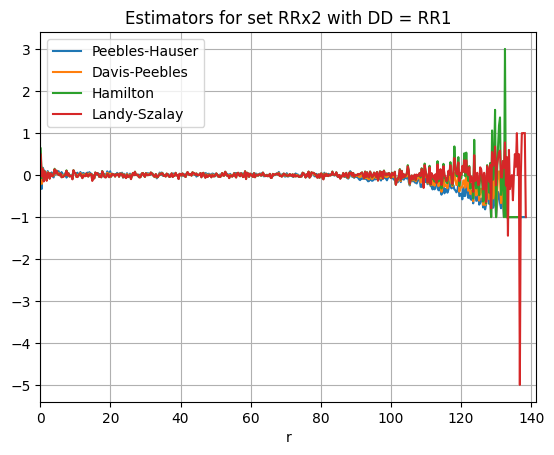

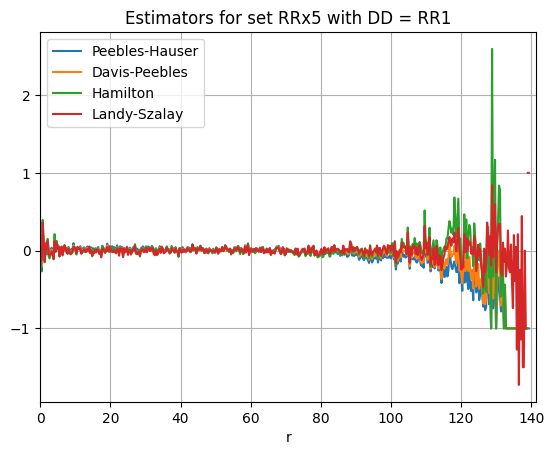

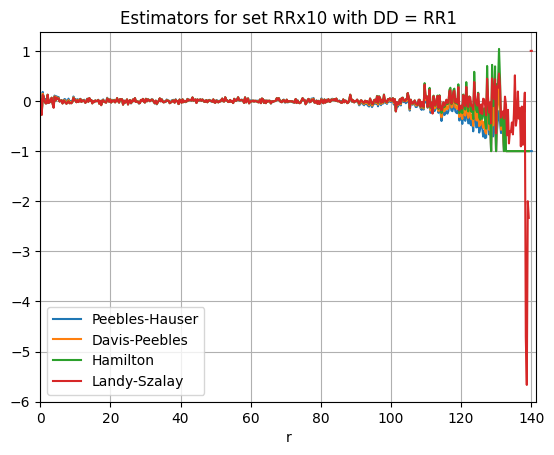

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [36]:
# Plots de los estimadores
# 2000 pts
plt.plot(RR[0], Peebles_Hauser(RR[1],RRx2[1]), label='Peebles-Hauser')
plt.plot(RR[0], Davis_Peebles(RR[1], DR1x2[1]), label='Davis-Peebles')
plt.plot(RR[0], Hamilton(RR[1], RRx2[1], DR1x2[1]), label='Hamilton')
plt.plot(RR[0], Landy_Szalay(RR[1], RRx2[1], DR1x2[1]), label='Landy-Szalay')
plt.xlim(0,dist_max)
plt.xlabel('r')
plt.title('Estimators for set RRx2 with DD = RR1')
plt.grid(True)
plt.legend()
plt.show()
# 5000 pts
plt.plot(RR[0], Peebles_Hauser(RR[1],RRx5[1]), label='Peebles-Hauser')
plt.plot(RR[0], Davis_Peebles(RR[1], DR1x5[1]), label='Davis-Peebles')
plt.plot(RR[0], Hamilton(RR[1], RRx2[1], DR1x5[1]), label='Hamilton')
plt.plot(RR[0], Landy_Szalay(RR[1], RRx5[1], DR1x5[1]), label='Landy-Szalay')
plt.xlim(0,dist_max)
plt.xlabel('r')
plt.title('Estimators for set RRx5 with DD = RR1')
plt.grid(True)
plt.legend()
plt.show()
# 10000 pts
plt.plot(RR[0], Peebles_Hauser(RR[1],RRx10[1]), label='Peebles-Hauser')
plt.plot(RR[0], Davis_Peebles(RR[1], DR1x10[1]), label='Davis-Peebles')
plt.plot(RR[0], Hamilton(RR[1], RRx10[1], DR1x10[1]), label='Hamilton')
plt.plot(RR[0], Landy_Szalay(RR[1], RRx10[1], DR1x10[1]), label='Landy-Szalay')
plt.xlim(0,dist_max)
plt.xlabel('r')
plt.title('Estimators for set RRx10 with DD = RR1')
plt.grid(True)
plt.legend()
plt.show()

np.seterr(divide='ignore', invalid='ignore')